# Bitcoin Price Prediction - Data Exploration

This notebook explores the Bitcoin price data, performs initial analysis, and visualizes key patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add the project root to Python path
sys.path.append(os.path.join(os.getcwd(), '..'))

from config.config import DATA_CONFIG
from utils.data_loader import BitcoinDataLoader

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

✅ Configuration loaded - Base directory: C:\bitcoin


## 1. Load Bitcoin Data

In [2]:
# Initialize data loader
data_loader = BitcoinDataLoader(DATA_CONFIG)

# Load data
df = data_loader.load_data()

print("📊 Data Overview:")
print(f"Shape: {df.shape}")
print(f"Date range: {df.index.min()} to {df.index.max()}")
print(f"Total days: {len(df)}")
print("\nColumns:", list(df.columns))
print("\nFirst 5 rows:")
df.head()

Loading Bitcoin data...
Found existing data file, loading...
❌ Error loading existing data: Missing column provided to 'parse_dates': 'date'
Cleaning up and generating fresh data...
Cleaning up existing data file...
Current file columns: ['index', 'close', 'open', 'high', 'low', 'volume']
Fixing missing 'date' column...
Generating sample Bitcoin data...
✅ Generated sample data with 2144 days (from 2020-01-01 to 2025-11-13)
   Current price: $28,670,613.49
💾 Data saved to C:\bitcoin\data\bitcoin_data.csv
📊 Data Overview:
Shape: (2144, 5)
Date range: 2020-01-01 00:00:00 to 2025-11-13 00:00:00
Total days: 2144

Columns: ['close', 'open', 'high', 'low', 'volume']

First 5 rows:


,close,open,high,low,volume
2020-01-01,30000.000000,29940.000000,30618.225674,29381.774326,2.000000e+10
2020-01-02,29915.023780,30000.000000,30338.617979,29491.429580,2.056651e+10
2020-01-03,30791.540133,29915.023780,31190.601753,29915.023780,2.586004e+10
2020-01-04,32793.042928,30791.540133,33155.678713,30791.540133,3.300034e+10
2020-01-05,32641.936033,32793.042928,32848.033861,32435.838206,2.092158e+10


In [3]:
# Basic statistics
print("📈 Basic Statistics:")
df.describe()

📈 Basic Statistics:


,close,open,high,low,volume
count,2.144000e+03,2.144000e+03,2.144000e+03,2.144000e+03,2.144000e+03
mean,5.897204e+06,5.883845e+06,6.036542e+06,5.751250e+06,2.636984e+10
std,9.358469e+06,9.346379e+06,9.578727e+06,9.131422e+06,4.903623e+09
min,2.108897e+04,2.108897e+04,2.156695e+04,2.062583e+04,2.000000e+10
25%,6.766440e+04,6.751794e+04,6.934397e+04,6.552965e+04,2.250988e+10
50%,6.329740e+05,6.306612e+05,6.501543e+05,6.163622e+05,2.529608e+10
75%,6.988941e+06,6.983725e+06,7.140978e+06,6.822208e+06,2.927146e+10
max,3.513072e+07,3.513072e+07,3.563009e+07,3.463134e+07,5.303895e+10


## 2. Price Analysis

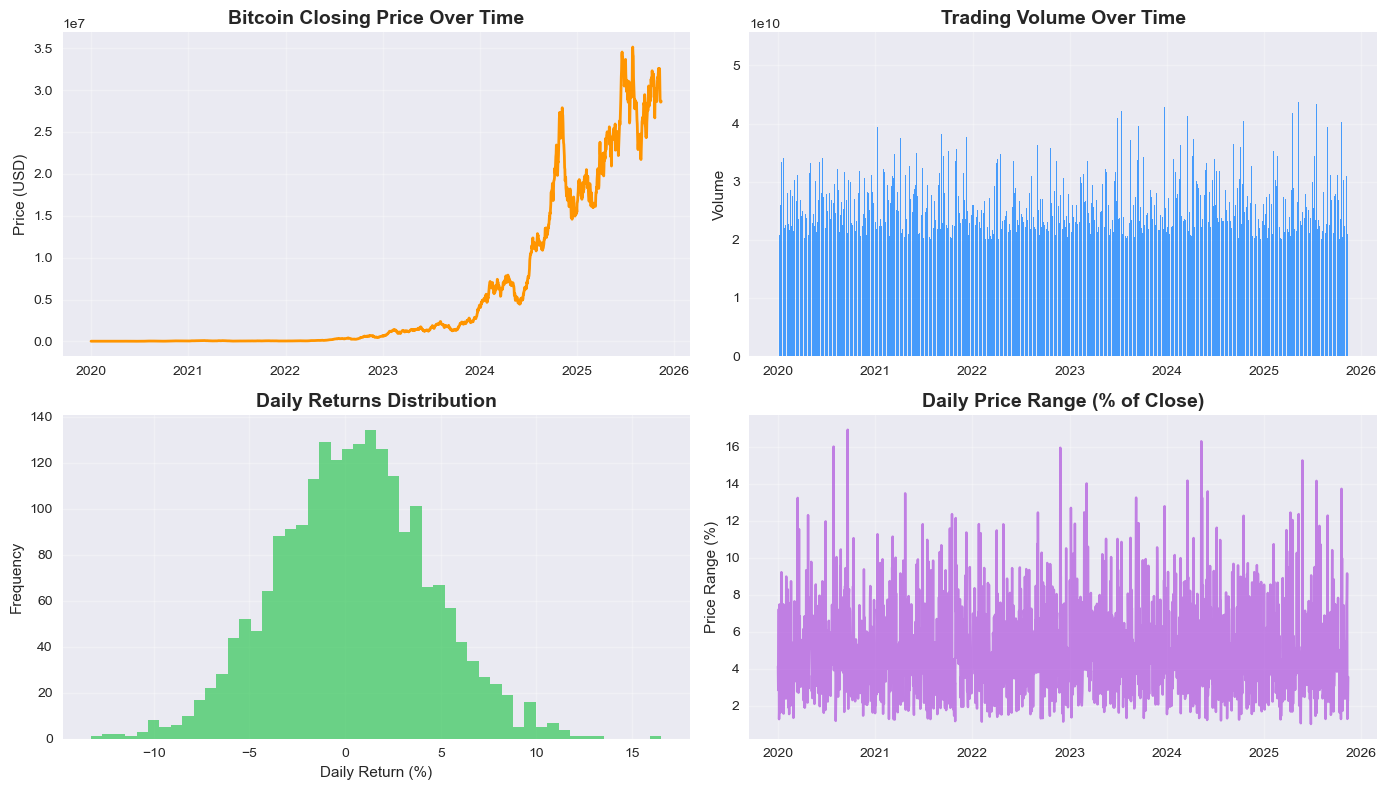

In [4]:
# Plot price history
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(df.index, df['close'], linewidth=2, color='#FF9500')
plt.title('Bitcoin Closing Price Over Time', fontweight='bold', fontsize=14)
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.bar(df.index, df['volume'], alpha=0.7, color='#007AFF')
plt.title('Trading Volume Over Time', fontweight='bold', fontsize=14)
plt.ylabel('Volume')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
daily_returns = df['close'].pct_change() * 100
plt.hist(daily_returns.dropna(), bins=50, alpha=0.7, color='#34C759')
plt.title('Daily Returns Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
price_range = (df['high'] - df['low']) / df['close'] * 100
plt.plot(df.index, price_range, alpha=0.7, color='#AF52DE')
plt.title('Daily Price Range (% of Close)', fontweight='bold', fontsize=14)
plt.ylabel('Price Range (%)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. Volatility Analysis

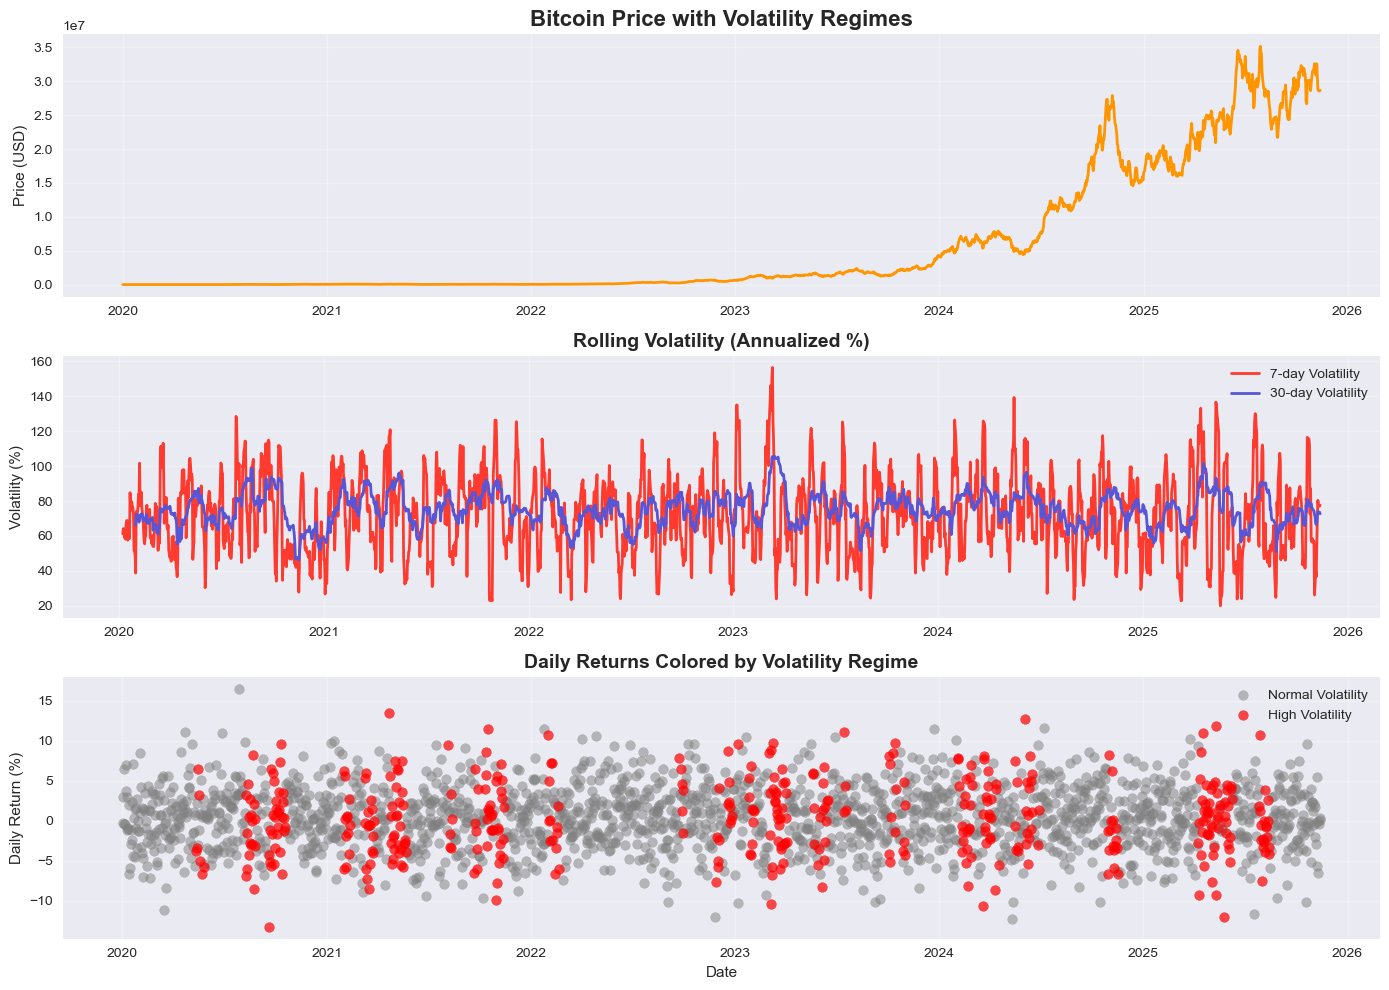

📊 Volatility Statistics:
Average 7-day volatility: 72.26%
Average 30-day volatility: 75.32%
High volatility threshold (80th percentile): 83.09%


In [5]:
# Calculate rolling volatility
df['daily_return'] = df['close'].pct_change()
df['volatility_7d'] = df['daily_return'].rolling(window=7).std() * np.sqrt(365) * 100  # Annualized
df['volatility_30d'] = df['daily_return'].rolling(window=30).std() * np.sqrt(365) * 100

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(df.index, df['close'], linewidth=2, color='#FF9500')
plt.title('Bitcoin Price with Volatility Regimes', fontweight='bold', fontsize=16)
plt.ylabel('Price (USD)')
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(df.index, df['volatility_7d'], label='7-day Volatility', linewidth=2, color='#FF3B30')
plt.plot(df.index, df['volatility_30d'], label='30-day Volatility', linewidth=2, color='#5856D6')
plt.title('Rolling Volatility (Annualized %)', fontweight='bold', fontsize=14)
plt.ylabel('Volatility (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 3)
# Identify high volatility periods (top 20%)
high_vol_threshold = df['volatility_30d'].quantile(0.8)
high_vol_periods = df['volatility_30d'] > high_vol_threshold

plt.scatter(df.index[~high_vol_periods], df['daily_return'][~high_vol_periods] * 100, 
           alpha=0.5, color='gray', label='Normal Volatility')
plt.scatter(df.index[high_vol_periods], df['daily_return'][high_vol_periods] * 100, 
           alpha=0.7, color='red', label='High Volatility')
plt.title('Daily Returns Colored by Volatility Regime', fontweight='bold', fontsize=14)
plt.ylabel('Daily Return (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Volatility Statistics:")
print(f"Average 7-day volatility: {df['volatility_7d'].mean():.2f}%")
print(f"Average 30-day volatility: {df['volatility_30d'].mean():.2f}%")
print(f"High volatility threshold (80th percentile): {high_vol_threshold:.2f}%")

## 4. Correlation Analysis

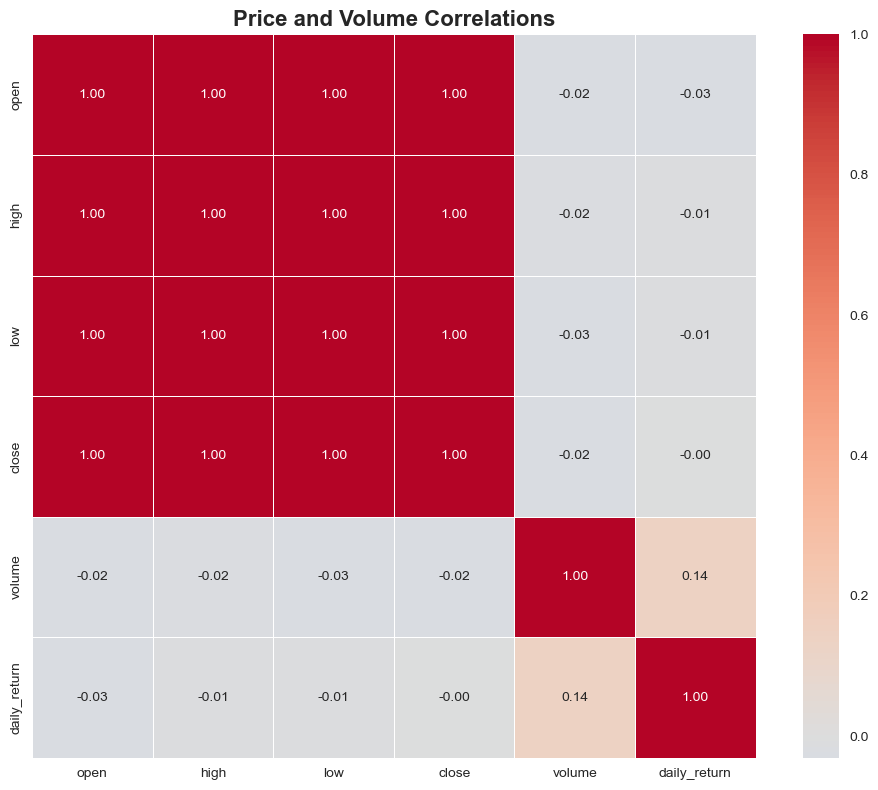

In [6]:
# Calculate correlations
correlation_matrix = df[['open', 'high', 'low', 'close', 'volume', 'daily_return']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Price and Volume Correlations', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

## 5. Seasonality and Trends

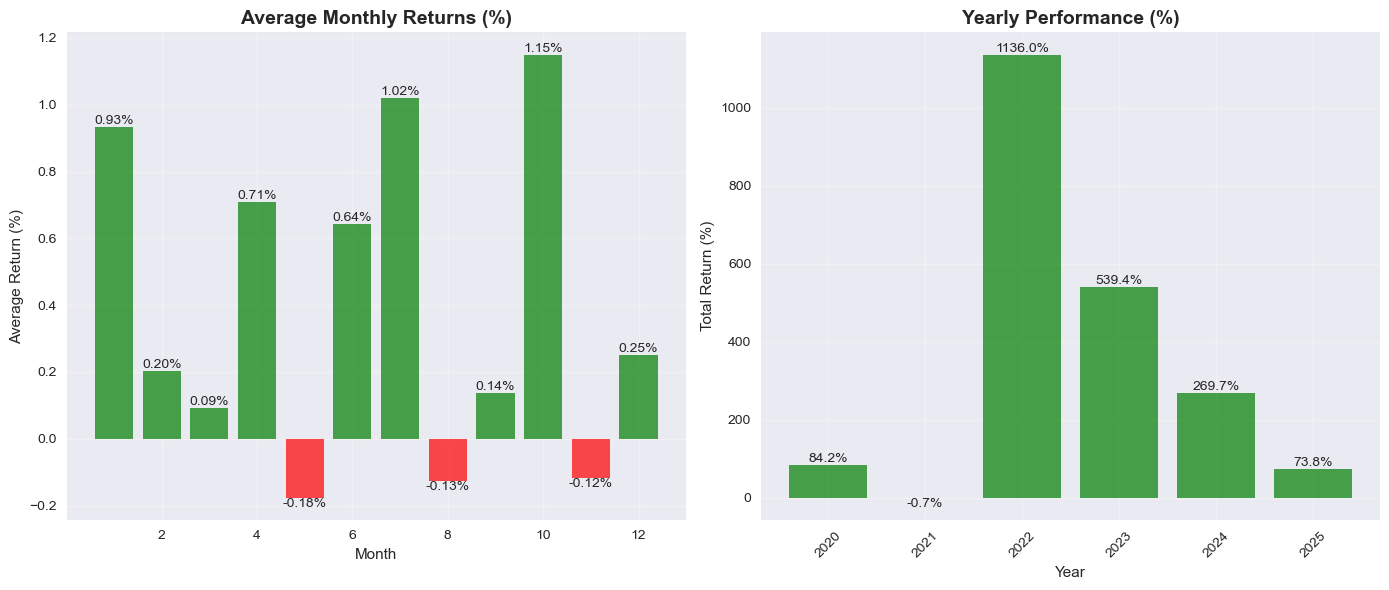

In [8]:
# Monthly performance analysis
df['month'] = df.index.month
df['year'] = df.index.year
monthly_returns = df.groupby('month')['daily_return'].mean() * 100

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
colors = ['red' if x < 0 else 'green' for x in monthly_returns]
bars = plt.bar(monthly_returns.index, monthly_returns, color=colors, alpha=0.7)
plt.title('Average Monthly Returns (%)', fontweight='bold', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom' if height >= 0 else 'top')

plt.subplot(1, 2, 2)
# Year-over-year performance
yearly_perf = df.groupby('year')['close'].apply(lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100)
colors = ['red' if x < 0 else 'green' for x in yearly_perf]
bars = plt.bar(yearly_perf.index.astype(str), yearly_perf, color=colors, alpha=0.7)
plt.title('Yearly Performance (%)', fontweight='bold', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Return (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom' if height >= 0 else 'top')

plt.tight_layout()
plt.show()

## 6. Data Quality Check

In [9]:
print("🔍 Data Quality Report:")
print("=" * 50)

# Check for missing values
print("\nMissing Values:")
missing_data = df.isnull().sum()
for col, missing in missing_data.items():
    if missing > 0:
        print(f"  {col}: {missing} missing values ({missing/len(df)*100:.2f}%)")

# Check for duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check for outliers in returns
returns = df['daily_return'].dropna()
q1 = returns.quantile(0.01)
q99 = returns.quantile(0.99)
outliers = returns[(returns < q1) | (returns > q99)]
print(f"\nExtreme returns (outside 1st-99th percentile): {len(outliers)} ({len(outliers)/len(returns)*100:.2f}%)")

# Check for zero or negative prices
invalid_prices = df[(df['close'] <= 0) | (df['open'] <= 0) | (df['high'] <= 0) | (df['low'] <= 0)]
print(f"Invalid prices (<= 0): {len(invalid_prices)}")

print("\n✅ Data exploration complete!")

🔍 Data Quality Report:

Missing Values:
  daily_return: 1 missing values (0.05%)
  volatility_7d: 7 missing values (0.33%)
  volatility_30d: 30 missing values (1.40%)

Duplicate rows: 0

Data Types:
close             float64
open              float64
high              float64
low               float64
volume            float64
daily_return      float64
volatility_7d     float64
volatility_30d    float64
month               int32
year                int32
dtype: object

Extreme returns (outside 1st-99th percentile): 44 (2.05%)
Invalid prices (<= 0): 0

✅ Data exploration complete!


## Key Insights from Data Exploration

1. **Price Trends**: Bitcoin shows significant volatility with clear bull/bear market cycles
2. **Volatility Patterns**: Periods of high volatility cluster together
3. **Correlations**: OHLC prices are highly correlated, as expected
4. **Seasonality**: Some monthly patterns may exist in returns
5. **Data Quality**: Good overall with minimal missing values

Next: Proceed to feature engineering in the next notebook.